<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 7
<br>Group member1: Joseph Tharayil
<br>Group member2: Kiyarash Farivar
<br>Group member3: Diogo Ramalho

# Ex1: Create your favorite neuron

<font size ="3">Write some code that builds a geometrical model of a neuron with one soma, one axon and two dendrites with three branches and visualize the resulting model. [0.5 pts]

Wrote cell 0 to cell_a_0000.swc
Wrote cell 1 to cell_a_0001.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f417e1037b8>)

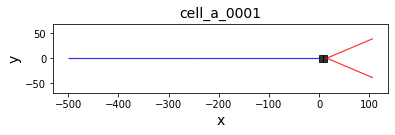

In [16]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

soma = h.Section(name='soma')
soma.L = soma.diam = 15

ax = h.Section(name='axon')
ax.L = 500
ax.diam = 5

d1 = h.Section(name='dend1')
d2 = h.Section(name='dend2')

ax.connect(soma(0))
d1.connect(soma(1))
d2.connect(soma(1))

neuron2swc('cell_a.swc', swap_yz=False)
neuron4 = nm.load_neuron('cell_a.swc')
viewer.draw(neuron4)

# Ex2: Visualizing neurons

<font size ="3">Select one of the neurons from your group data set. Write a code that visualizes the neuron oriented on the three possible planes (xy, xz and yz) and its neurites. Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled as well. [1.5 pts]

# Ex3: Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group. Some of them are good morphology files and some have mistakes. Write down which files have errors and enumerate their errors. (You can use or copy here the code from tutorial 02). Explain, on your own words, some ideas about how you would correct the mistakes from your bad morphology files. [1.5 pts]

# Ex4: Morphometrics

<font size = "3">Now that you know which cells, out of your group data set are morphologically correct, its time to analyze some morphological characteristics of them. 

<font size = "3">Compute: the total_basal_length, the total_axonal_length and the soma_volume of the cells in your group data set that have no mistakes. Represent the result of all the cells on three different histograms: total_basal_length, total_axonal_length and soma_volume. Do you see any differences? If yes, explain them. Would you be able to classify the cells based on these differences?  [2.5 pts]

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex3 and Ex4.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://watermark.silverchair.com/bhy339.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAnwwggJ4BgkqhkiG9w0BBwagggJpMIICZQIBADCCAl4GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjL2dxX4XnctI8PSkAgEQgIICL871rzxAccwBPnWDWJYXnmhez2c206RYVCnDmVVfJdui3Y0__27wwcSCeSvs8bMO-ySrUsntk8bkKC0g0_2zqK9F-IRlkpL4X120sWQoyjsnZSRgpQgBRjhTGqEiQFSv6VpT1NS7tw8Ytgz0nxRzd6uVmAJmm4hA3Qt6xerIeKCuUP2LZhWFPCkCqY9Z6vrTWs31nKibrYQyhfebtfrjQUXZM41f-jg19pGQW353OY8X8EHbnlzljAF25bPO1dFcoJ9z1YrIavhUJvrC_ROcrQ_xFpf43nLKtv44PxSR8ynIh1W87NKQjMy09q_SeEqL2rQcbMm_GxJp11_T39iAZeoghTOsj9nbJM1DcZ_EHiPDUimGWP-zX3GgPa5OFMYDW99UlS7aoEhLUMeNOagm1McT8U3SYyKYUSmKuWbxSE4vzzl6i4kfVTZinPCc2pJUO7foA11nzp8Od-BadQFDv4oC306nDSWJWe62Y4qbGmzR4MLnO_Gunf9wmszwyNHckn81sxPmTBmnTKYkYNJLUGjZFluRgw_Ssjvk42kBawDJ338-CdN0zTm7paxSSDTu32ZKLLaEjchehmkt5ecY3qn5cNXgAo-BGoMDN2Cl9h5F_NZlR4vTg2B3vRKKmKfjt1tLqoG8K4FrO3LNE8cmCZ-f3iFGSeDOD_VMFb5O0q68uqnlfRN6Ep56WChWSWRS92wNhGx7rUQAOvK7dJWK7oIPaxXBh55_RpZn2BQI0WQ)